# msd-from-tip-log DAG workflow  
TODO(later): add option to skip recomputation of cached results<br>
Tim Tyree<br>
1.18.2021


In [1]:
from lib.my_initialization import *
from lib import *

from lib.my_initialization import *
from lib.utils.utils_traj import *

from lib.utils.operari import *


import trackpy, pandas as pd, numpy as np
from lib import *
from lib.routines.track_tips import *
from lib.utils.dist_func import *
from lib.utils.utils_traj import *

from lib.routines.compute_trajectories import *
from lib.routines.dag_log_to_msd import *
from lib.routines.compute_msd import *

import trackpy
%autocall 1
%load_ext autoreload
%autoreload 2
# awareness&chill

Automatic calling is: Smart


In [2]:
# #make plots in darkmode
# import seaborn as sns
# from jupyterthemes import jtplot
# jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

In [ ]:
#TODO: turn the diffcoef_summary into a .csv update instead of overwriting

# (ignore dev) generate msd figures

In [2]:
# #find file interactively
# print("please select a file from within the desired folder.")
# file = search_for_file()
file='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-2/ds_2_param_set_8/Log/ic_200x200.001.12_log.csv'
trgt='log.csv'
assert(file[-len(trgt):]==trgt)

file_name_list=get_all_files_matching_pattern(file,trgt)
print(len(file_name_list))
os.chdir(nb_dir)

171


In [3]:
# make unwrapped trajectory for file_name_list
# run_routine_log_to_msd
# # b = db.from_sequence(file_name_list[:2], npartitions=2).map(run_routine_log_to_msd)
# b = db.from_sequence(file_name_list, npartitions=2).map(run_routine_log_to_msd)
# start = time.time()
# retval = list(b)
# print(f"run time for generating trajectories from file_name_list: {time.time()-start:.2f} seconds.")
# beep(3)
# output_file_name_list=retval
# print(len(output_file_name_list))

In [18]:
# #compute mean squared displacements, aggregating results
# n_tips=1; DT=1.
# file_out=output_file_name_list[0]
# # file_out='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-2/ds_1_param_set_8/trajectories/ic_200x200.011.11_traj_sr_400_mem_0_unwrap.csv'
# # file_out='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-2/ds_2_param_set_8/trajectories/ic_200x200.011.11_traj_sr_400_mem_0_unwrap.csv'
# retval=gen_msd_figs(file_out,n_tips, DT)#, V_thresh=0.4)

Num. file names in list = 171.
ValueError: No objects to concatenate
	trial that failed: ic_200x200.008.12_traj_sr_400_mem_0_unwrap.csv
ValueError: No objects to concatenate
	trial that failed: ic_200x200.011.31_traj_sr_400_mem_0_unwrap.csv
ValueError: No objects to concatenate
	trial that failed: ic_200x200.018.31_traj_sr_400_mem_0_unwrap.csv
ValueError: No objects to concatenate
	trial that failed: ic_200x200.011.33_traj_sr_400_mem_0_unwrap.csv
saved figure in 
	emsd_longest_by_trial_tips_ntips_1_long_time_std.png
saved figure in 
	emsd_longest_by_trial_tips_ntips_1_short_time_std.png
saved figure in 
	emsd_longest_by_trial_tips_ntips_1_very_short_time_std.png


In [19]:
# file_out='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-2/ds_2_param_set_8/trajectories/ic_200x200.011.11_traj_sr_400_mem_0_unwrap.csv'
# retval=gen_msd_figs(file_out,n_tips, DT)#, V_thresh=0.4)

Num. file names in list = 171.
ValueError: No objects to concatenate
	trial that failed: ic_200x200.017.23_traj_sr_400_mem_0_unwrap.csv
ValueError: No objects to concatenate
	trial that failed: ic_200x200.005.22_traj_sr_400_mem_0_unwrap.csv
ValueError: No objects to concatenate
	trial that failed: ic_200x200.006.23_traj_sr_400_mem_0_unwrap.csv
saved figure in 
	emsd_longest_by_trial_tips_ntips_1_long_time_std.png
saved figure in 
	emsd_longest_by_trial_tips_ntips_1_short_time_std.png
saved figure in 
	emsd_longest_by_trial_tips_ntips_1_very_short_time_std.png


# (ignore dev) find dag workflow for one trial and give it a caching option
- Hint: use os.path.exists(fn)

In [4]:
#TODO: make a function that _for one trial_folder_ computes all analysis steps from tracking to diffcoeff output
##################
# Scrum: 1.23.2021
##################
#TODO: make a function that _for one trial_folder_ computes all analysis steps from tracking to diffcoeff output
#TODO: give ^this function a kwarg option use_cached_files=True, that looks for files already existing 
#TODO: make a function that computes all analysis steps from tracking to diffcoeff table
#TODO: give ^this function a kwarg option use_cached_files=True, that looks for files already existing 
#TODO(later): make viewer for data, where I give a trial_folder and it shows me all the plots for it

In [5]:
# find dag workflow for one trial and give it a caching option
# - Hint: use os.path.exists(fn)

In [2]:
def msd_fig_gener(input_file_name,n_tips=1):
    trgt='_unwrap.csv'
    assert(input_file_name[-len(trgt)]==trgt)
    #Generate msd figures for input_file_name
    dirname = os.path.dirname(input_file_name).split('/')[-1]
    folder_name=os.path.dirname(input_file_name)
    save_folder = folder_name.replace(dirname,'msd')
    output_file_name = f"emsd_longest_by_trial_tips_ntips_{n_tips}.csv"
    #determine DT
    df=pd.read_csv(input_file_name)
    DT=df.t.head(2).diff().dropna().values[0]
    retval=gen_msd_figs(file_out,n_tips, DT)#, V_thresh=0.4)
    return retval

In [11]:
n_tips=1
use_cache=True
input_file_name='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-2/ds_2_param_set_8/trajectories/ic_200x200.011.11_traj_sr_400_mem_0_unwrap.csv'
msd_fig_gener(input_file_name,n_tips)

1.0

In [22]:
#compute the ensemble mean squared displacements for each trial
#determine DT
input_file_name=file_name_list[0]
df=pd.read_csv(input_file_name)
DT=df.t.head(2).diff().dropna().values[0]
os.chdir(save_folder)
if not use_cache or not os.path.exists(output_file_name):
    
    output_file_name=generate_msd_figures_routine_for_list(file_name_list, n_tips,DT=DT,put_file_name=None,save_folder=None,**kwargs):


In [19]:
save_folder

'/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-2/ds_2_param_set_8/msd'

# define module for diffusion analysis pipeline

In [23]:
from lib.routines.dag_log_to_msd import *
dag_a_postprocess

<function lib.routines.dag_log_to_msd.dag_a_postprocess(emsd_fn, trial_folder_name, dir_out, **kwargs)>

In [20]:
def run_routine_log_to_unwrapped_trajectory(input_file_name, use_cache=True, sr=400, mem=0, **kwargs):
    '''ic is a .csv file name of a tip log.'''
    traj_fn = os.path.abspath(input_file_name).replace('/Log','/trajectories').replace('log.csv', f'traj_sr_{sr}_mem_{mem}.csv')
    output_file_name = traj_fn.replace('/trajectories','/trajectories_unwrap').replace('.csv',"_unwrap.csv")
    if not use_cache or not os.path.exists(traj_fn):
        traj_fn = generate_track_tips_pbc(input_file_name, save_fn=traj_fn, **kwargs)
    if not use_cache or not os.path.exists(output_file_name):
        retval_ignore = unwrap_trajectories(traj_fn, output_file_name)      
    return os.path.abspath(output_file_name)

def run_routine_unwrapped_trajectories_to_diffcoeff_summary(file_name_list,trial_folder_name,use_cache=True,n_tips=1,**kwargs):
    '''file_name_list is a list of strings locating files ending in _unwrap.csv'''
    input_file_name=file_name_list[0]
    #determine DT
    df=pd.read_csv(input_file_name)
    DT=df.t.head(2).diff().dropna().values[0]
    dirname = os.path.dirname(input_file_name).split('/')[-1]
    folder_name=os.path.dirname(input_file_name)
    save_folder = folder_name.replace(dirname,'msd')
    emsd_fn = os.path.join(save_folder,f"emsd_longest_by_trial_tips_ntips_{n_tips}.csv")
    if not os.path.exists(save_folder):
        os.mkdir(save_folder)
    os.chdir(save_folder)
    if not use_cache or not os.path.exists(emsd_fn):
        #compute the ensemble mean squared displacements for each trial
        emsd_fn=generate_msd_figures_routine_for_list(file_name_list, n_tips, DT=DT,
                                                               output_file_name=emsd_fn,
                                                               save_folder=save_folder,**kwargs)
    #compute the diffusion coefficient summary
    os.chdir(os.path.dirname(emsd_fn))
    dir_out=os.path.join(save_folder,"diffcoeff_summary_"+os.path.basename(emsd_fn))
    if not use_cache or not os.path.exists(dir_out):
        dir_out = dag_a_postprocess(emsd_fn=emsd_fn,
                                trial_folder_name=trial_folder_name,
                                dir_out=dir_out,**kwargs)
    return dir_out

def workflow_reduce_logs_to_diffcoeff_summary(input_fn_lst, use_cache_0=True,use_cache_1=False, npartitions=2, **kwargs):
    print(f"the total number of trials recorded is {len(input_fn_lst)}")
    def routine(fn):
        output_file_name=run_routine_log_to_unwrapped_trajectory(fn, use_cache=use_cache_0,**kwargs)
        return output_file_name
    b = db.from_sequence(input_fn_lst, npartitions=npartitions).map(routine)
    file_name_list = list(b)
    print(f'reducing {len(file_name_list)} unwrapped trajectories files to a single row describing the diffusion coefficient of spiral tips for that trial...')
    #reduce reduce_logs_to_diffcoeff_summary
    df_out= run_routine_unwrapped_trajectories_to_diffcoeff_summary(file_name_list,use_cache=use_cache_1,**kwargs)
    return df_out
    


In [9]:
def get_all_logs(trial_folder,trial_folder_name):
    cwd=os.getcwd()
    file=f"{trial_folder}/Log/ic_200x200.001.12_log.csv"
    trgt='log.csv'
    assert(file[-len(trgt):]==trgt)
    input_fn_lst=get_all_files_matching_pattern(file,trgt)
    # print(len(input_fn_lst))
    os.chdir(cwd)
    return input_fn_lst

In [10]:
def gen_diffcoeff_summary(trial_folder_name,ic_suite_fn,**kwargs):
    #find all log files for each trial folder
    trial_folder=f"{ic_suite_fn}/{trial_folder_name}"
    input_fn_lst= get_all_logs(trial_folder,trial_folder_name)
    print(f"{trial_folder_name} contains {len(input_fn_lst)} tip logs")
    #reduce that trial folder to a single diffusion coefficient row
    diffcoeff_summary_fn=workflow_reduce_logs_to_diffcoeff_summary(
        input_fn_lst,trial_folder_name=trial_folder_name,
        use_cache_0=True, use_cache_1=False,**kwargs)
    return diffcoeff_summary_fn


In [36]:
# def get_all_trial_folders_not_archived(ic_suite_fn):
#     os.chdir(ic_suite_fn)
#     dir_lst=os.listdir()
#     trial_folder_name_lst=[]
#     for dir_run in dir_lst:
#         # dir_run=dir_lst[0]
#         trial_folder_name=dir_run
#         #test if trial_folder_name is not a folder
#         boo  = os.path.isdir(trial_folder_name)
#         #test if trial_folder_name starts with ic
#         boo &=trial_folder_name[:2]!='ic'
#         #test if trial_folder_name contains archiv
#         boo &=trial_folder_name.find('archiv')==-1
#         #if not, append it to the trial_folder_name_lst
#         if boo:
#             trial_folder_name_lst.append(trial_folder_name)
#     return trial_folder_name_lst

In [5]:
# #find all log files for a given trial
# trial_folder_name='ds_5_param_set_3'
# trial_folder=f"{nb_dir}/Data/initial-conditions-suite-2/{trial_folder_name}"
# input_fn_lst= get_all_logs(trial_folder,trial_folder_name)
# print(len(input_fn_lst))

In [15]:
#DONE: test workflow_reduce_logs_to_diffcoeff_summary runtime on trial_folder with cached results
# pipeline to run up to an individual data run (workflow_reduce_logs_to_diffcoeff_summary)

def diffcoeff_table_gener(ic_suite_fn,trial_folder_name_lst,dict_kwargs_trial,npartitions=2,**kwargs_table):
    #generate the diffusion table
    for trial_folder_name in trial_folder_name_lst:
        kwargs_trial= dict_kwargs_trial[trial_folder_name]
        print(f'beginning diffusion analysis of {trial_folder_name}...')
        diffcoeff_summary_fn= gen_diffcoeff_summary(trial_folder_name,ic_suite_fn,npartitions=npartitions,**kwargs_trial)
    #reduce
    retval= gen_diffcoeff_table(ic_suite_fn,trial_folder_name_lst,**kwargs_table)
    return retval

# FK model analysis pipeline

In [45]:
ic_suite_fn=f"{nb_dir}/Data/initial-conditions-suite-2"
trial_folder_name_lst=get_all_trial_folders_not_archived(ic_suite_fn)    
#initialize dict_kwargs_trial
dict_kwargs_trial={}
for fn in trial_folder_name_lst:
    dict_kwargs_trial[fn]={}
    
#add any custom changes to instances of the analysis pipeline
dict_kwargs_trial['ds_5_param_set_3']['duration_thresh']=.35
# # other parameters of potential interest
# tau_min=.15, n_tips=1,DT=1., 
print(trial_folder_name_lst)

['ds_5_param_set_8_fastkernel_V_0.4', 'ds_5_param_set_4', 'ds_5_param_set_8_og', 'ds_5_param_set_8_fastkernel_V_0.5', 'ds_10_param_set_8_og', 'ds_5_param_set_8_fastkernel_V_0.6', 'ds_1_param_set_8', 'ds_5_param_set_3', 'ds_2_param_set_8']


In [46]:
trial_folder_name_lst=['ds_5_param_set_8_fastkernel_V_0.4','ds_5_param_set_3','ds_5_param_set_4','ds_5_param_set_8_og','ds_10_param_set_8_og']

In [ ]:
retval= diffcoeff_table_gener(ic_suite_fn,trial_folder_name_lst,dict_kwargs_trial,npartitions=2)

beep(10)
print(f"retval is {retval}")

Frame 300000: 19 trajectories present.


In [ ]:
# diffcoeff_summary_fn= gen_diffcoeff_summary(trial_folder_name,ic_suite_fn,**kwargs_trial)


In [114]:
#DONE: test workflow_reduce_logs_to_diffcoeff_summary runtime on trial_folder with cached results
# pipeline to run up to an individual data run (workflow_reduce_logs_to_diffcoeff_summary)

# # def gener_diffcoeff_table(ic_suite_fn,trial_folder_name_lst,**kwargs):
# #TODO: generate the diffusion table
# for trial_folder_name in trial_folder_name_lst:
#     kwargs_trial= dict_kwargs_trial[trial_folder_name]
#     print(f'beginning diffusion analysis of {trial_folder_name}...')
#     diffcoeff_summary_fn= gen_diffcoeff_summary(trial_folder_name,ic_suite_fn,npartitions=6,**kwargs_trial)


'ds_2_param_set_8'

# LR model analysis pipeline

In [26]:
ic_suite_fn=f"{nb_dir}/Data/initial-conditions-suite-3-LR"
trial_folder_name_lst=get_all_trial_folders_not_archived(ic_suite_fn)    
#initialize dict_kwargs_trial
dict_kwargs_trial={}
for fn in trial_folder_name_lst:
    dict_kwargs_trial[fn]={}
    
#add any custom changes to instances of the analysis pipeline
# dict_kwargs_trial['ds_5_param_set_3']['duration_thresh']=.35
# # other parameters of potential interest
# tau_min=.15, n_tips=1,DT=1., 
print(trial_folder_name_lst)

['ds_5_param_qu_tmax_1', 'ds_2_param_qu_tmax_10', 'ds_5_param_qu_tmax_30_Ko_7.0', 'ds_5_param_qu_tmax_1_deprec_V_-60.', 'ds_5_param_qu_tmax_10_Ko_5.4', 'ds_5_param_qu_tmax_10_Ko_7', 'ds_7.5_param_qu_tmax_30', 'ds_5_param_qu_tmax_10', 'ds_5_param_qu_tmax_30_Ko_5.4']


In [27]:
trial_folder_name_lst=['ds_7.5_param_qu_tmax_30']#'ds_5_param_qu_tmax_10_Ko_7','ds_5_param_qu_tmax_30_Ko_5.4']
# trial_folder_name_lst=['ds_5_param_qu_tmax_10',

In [30]:
retval= diffcoeff_table_gener(ic_suite_fn,trial_folder_name_lst,dict_kwargs_trial,
                              npartitions=2, use_cache_1=False)#, R2_thresh=0.0,duration_thresh=.0, tau_min=0.)
beep(2)
print(f"retval is {retval}")

beginning diffusion analysis of ds_7.5_param_qu_tmax_30...
ds_7.5_param_qu_tmax_30 contains 159 tip logs
the total number of trials recorded is 159
reducing 159 unwrapped trajectories files to a single row describing the diffusion coefficient of spiral tips for that trial...
Num. file names in list = 159.
ValueError: No objects to concatenate
	trial that failed: ic008.21_traj_sr_400_mem_0_unwrap.csv
ValueError: No objects to concatenate
	trial that failed: ic005.33_traj_sr_400_mem_0_unwrap.csv
saved figure in 
	/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/ds_7.5_param_qu_tmax_30/msd/fig
saved figure in 
	/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/ds_7.5_param_qu_tmax_30/msd/fig
saved figure in 
	/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/ds_7.5_param_qu_tmax_30/msd/fig
generating diffcoeff_figures for ds_7.5_param_qu_tmax_30
	num. trials that didn't show a tip 

In [22]:
#add any custom changes to instances of the analysis pipeline
# dict_kwargs_trial['ds_5_param_set_3']['duration_thresh']=.35
# # other parameters of potential interest
# tau_min=.15, n_tips=1,DT=1., 

# diffcoeff_summary_fn= gen_diffcoeff_summary(trial_folder_name,ic_suite_fn,**kwargs_trial)
retval

['diffcoeff_summary_diffcoeff_emsd_longest_by_trial_tips_ntips_1_Tmin_0.15_Tmax_0.5.csv',
 'diffcoeff_summary_diffcoeff_emsd_longest_by_trial_tips_ntips_1_Tmin_0.15_Tmax_0.5.csv']

In [13]:
#bare combine diffcoeff_summaries
# os.chdir(os.path.dirname(emsd_fn))
dir_out=os.path.join(save_folder,"diffcoeff_summary_"+os.path.basename(emsd_fn))
# if not use_cache or not os.path.exists(dir_out):
dir_out = dag_a_postprocess(emsd_fn=emsd_fn,
                        trial_folder_name=trial_folder_name,
                        dir_out=dir_out,**kwargs)

# define function that takes a folder of care_worker output and returns a df where each trial is represented no more than 1 time


In [2]:
nb_dir

'/Users/timothytyree/Documents/GitHub/care/notebooks'

In [3]:
log_folder="/Users/timothytyree/Documents/GitHub/care_worker/python/Log"
os.chdir(log_folder)

In [4]:
input_fn_lst=[os.path.abspath(fn) for fn in os.listdir() if fn.find('job.out.')!=-1]
print(f"the number of output files in folder is {len(input_fn_lst)}.")

the number of output files in folder is 1965.


In [5]:

# df.head()

In [6]:
# def read_inputs(line,trgt_lst):
#     input_lst=[]
#     for trgt in trgt_lst:
#         i=line.find(trgt)
#         l=len(trgt)
#         val=eval(line[i+l:].split(',')[0])
#         input_lst.append(val)
#     return input_lst

import re
def parse_inputs(line):
    result_keys = re.findall(r'\S+=', line)
    result_values = re.findall(r'=\d+', line) 
    if len(result_values)==0:
        pass
        #     return None
    input_dict={}
    for k,v in zip(result_keys,result_values):
        key=k.split('=')[0].split(',')[-1]
        value=eval(v.split('=')[-1])
        input_dict[key]=value
    return input_dict

def next_line(f):
    yield f.readline()

def parse_input_params(input_fn):
    line_no=0
    #read through until the outputs starts
    with open(input_fn) as f:
        for line in f:
            line_no+=1
            input_dict=parse_inputs(line)
            if len(list(input_dict))>0: 
                found_output=True
                return line_no, input_dict
    return -1,{}


In [7]:
def parse_input_fn(input_fn):
    printing=False
    line_no, input_dict=parse_input_params(input_fn)
    found_output=line_no!=-1
    if found_output and printing:
        print(f'the inputs found on line {line_no} were {input_dict}.')
    try:
        #         print(line_no)
        df=pd.read_csv(input_fn,header=line_no+1,delim_whitespace=True).astype({'n':int})
    except Exception:
        #only 1 line found in file, input_fn, skip
        return None
    
    df.drop(columns=['index'],inplace=True)
    df
    #reset frame number to start at zero
    df['frame']=df['frame']-df['frame'].values[0]
    #updating df...
    for k in input_dict.keys():
        df[k]=input_dict[k]

    index_labels=["L","txt_id1","txt_id2"]
    column_labels=["frame","x","y","particle","n","grad_ux","grad_uy","grad_vx","grad_vy"]
    df.set_index(keys=index_labels,inplace=True)#, columns=column_labels)
    # df=df[column_labels]
    return df

In [39]:
def return_df_updated_with_input_folder(input_fn_lst):#,df=None):
    """    returns df with this schema,
    multindex L|txt_id1|txt_id2|frame|particle
    and columns frame,x,y,n,t,grad_ux,grad_uy,grad_vx,grad_vy,particle
    input_fn='/Users/timothytyree/Documents/GitHub/care_worker/python/Log/job.out.8051248.703'
    """
    K12_index_set={}
    df_lst=[]
#     if df is None:
#         del df
    for input_fn in input_fn_lst:
        retval= parse_input_fn(input_fn)
        # df.unstack(1).unstack(1).head()
        if retval is not None:
            # TODO(optional for faster runtime): update a df_out only if it does not yet contain input_dict
            # TODO(optional test): assert that whenever an output is repeated, 
            # that their results are equal (to floating point precision)
            K12_index=retval.index.values[0][:3]
            src="{}_{}_{}".format(*K12_index)
            retval['src']=src
            #count if K12_index exists in the set of current index values
            try:
                K12_index_set[K12_index]+=1
            except KeyError:
                #then add K12_index to the set
                K12_index_set[K12_index]=0
                # K12_index_set.update({K12_index:0})
                df_lst.append(retval)
                print(f"the src={src} spiral tip lasted {retval.t.max()-retval.t.min()} ms.")
    print(K12_index_set)
    return df_lst,K12_index_set

In [40]:
df_lst,K12_index_set=return_df_updated_with_input_folder(input_fn_lst)
# df.index.values
# K12_index_set

the src=529_0_0 spiral tip lasted 876.0 ms.
the src=404_1_1 spiral tip lasted 930.0 ms.
the src=613_0_0 spiral tip lasted 486.0 ms.
the src=420_0_5 spiral tip lasted 904.0 ms.
the src=447_1_0 spiral tip lasted 1324.0 ms.
the src=360_1_8 spiral tip lasted 620.0 ms.
the src=361_2_8 spiral tip lasted 750.0 ms.
the src=457_3_2 spiral tip lasted 48.0 ms.
the src=472_2_1 spiral tip lasted 778.0 ms.
the src=455_2_3 spiral tip lasted 878.0 ms.
the src=426_3_4 spiral tip lasted 632.0 ms.
the src=489_3_3 spiral tip lasted 206.0 ms.
the src=371_2_3 spiral tip lasted 392.0 ms.
the src=440_3_7 spiral tip lasted 6.0 ms.
the src=544_3_2 spiral tip lasted 548.0 ms.
the src=523_0_1 spiral tip lasted 1206.0 ms.
the src=531_2_3 spiral tip lasted 6.0 ms.
the src=306_1_7 spiral tip lasted 406.0 ms.
the src=513_2_3 spiral tip lasted 292.0 ms.
the src=327_3_15 spiral tip lasted 594.0 ms.
the src=353_1_12 spiral tip lasted 704.0 ms.
the src=357_1_14 spiral tip lasted 904.0 ms.
the src=363_2_5 spiral tip laste

In [41]:
print(f"{len(list(K12_index_set))} distinct trials were successfully recorded.")

39 distinct trials were successfully recorded.


In [42]:
df=pd.concat(df_lst)
df.head()

t   n         x          y  grad_ux  grad_uy  \
L   txt_id1 txt_id2                                                      
529 0       0        2674.0  32  0.000000   0.000000  1.68924  0.18676   
            0        2676.0  34 -1.061890   4.804138  1.42292  0.50777   
            0        2678.0  34 -2.404633   8.383820  1.29731  0.65854   
            0        2680.0  34 -3.996124  11.647675  1.24995  0.71677   
            0        2682.0  38 -5.219940  13.588715  1.08055  0.90952   

                     grad_vx  grad_vy  frame  particle      src  
L   txt_id1 txt_id2                                              
529 0       0        2.52048 -0.79924      0      1156  529_0_0  
            0        1.97250 -0.13491      1      1156  529_0_0  
            0        2.19612 -0.37403      2      1156  529_0_0  
            0        1.78466  0.10811      3      1156  529_0_0  
            0        2.14106 -0.28554      4      1156  529_0_0

In [43]:
#save df as csv in care
save_folder=os.path.join(nb_dir,'Data/cloud_results')
os.chdir(save_folder)
save_fn='longest_traj_by_area_lr_pbc.csv'
df.to_csv(save_fn)

In [44]:
#TODO: verify save
#TODO: compute the area for each trial
#TODO: detect brownian motion for each trial
#TODO: compute the largest number of repeats of a single trial run


In [45]:
K12_index_set

{(529, 0, 0): 0,
 (404, 1, 1): 0,
 (613, 0, 0): 0,
 (420, 0, 5): 0,
 (447, 1, 0): 0,
 (360, 1, 8): 0,
 (361, 2, 8): 0,
 (457, 3, 2): 0,
 (472, 2, 1): 0,
 (455, 2, 3): 0,
 (426, 3, 4): 0,
 (489, 3, 3): 0,
 (371, 2, 3): 0,
 (440, 3, 7): 0,
 (544, 3, 2): 0,
 (523, 0, 1): 0,
 (531, 2, 3): 0,
 (306, 1, 7): 0,
 (513, 2, 3): 0,
 (327, 3, 15): 0,
 (353, 1, 12): 0,
 (357, 1, 14): 0,
 (363, 2, 5): 0,
 (592, 2, 3): 0,
 (367, 2, 8): 0,
 (367, 2, 6): 0,
 (364, 2, 5): 0,
 (547, 2, 1): 0,
 (355, 2, 12): 0,
 (452, 1, 3): 0,
 (317, 1, 6): 0,
 (317, 1, 9): 0,
 (346, 3, 3): 0,
 (515, 0, 1): 0,
 (554, 2, 1): 0,
 (534, 1, 0): 0,
 (300, 0, 7): 0,
 (513, 0, 3): 0,
 (392, 0, 8): 0}

# TODO(next):

In [46]:
#load df 
data_folder=os.path.join(nb_dir,'Data/cloud_results')
os.chdir(data_folder)
data_fn='longest_traj_by_area_lr_pbc.csv'

In [47]:
#DONE: compute the area for each trial
df=pd.read_csv(data_fn)
df['area']=df.L**2*0.025**2#cm^2

In [48]:
#TODO: plot MSD for each trial
d=df[(df.L==513)& (df.txt_id1==0)&(df.txt_id2==3)]
#TODO: detect brownian motion for each trial
#TODO: compute the largest number of repeats of a single trial run

In [49]:
print(f"this spiral tip lasted {d.t.max()-d.t.min()} ms.")

this spiral tip lasted 228.0 ms.


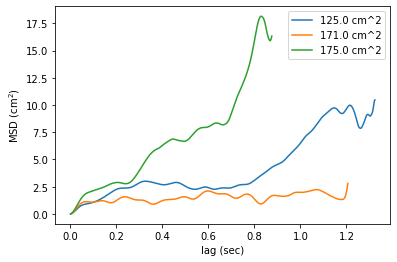

In [65]:
src_lst=['447_1_0',"523_0_1","529_0_0"]
A_lst=[447**2*DS**2,523**2*DS**2,529**2*DS**2]
for A,src in zip(A_lst,src_lst):
    d_in=df[df.src==src]

    DS=0.025#cm per pixel
    DT=2.#ms per frame
    #compute ensemble mean squared displacement
    emsd = trackpy.motion.emsd(d_in, mpp=1., fps=1.,max_lagtime=40000)
    #cast ensemble mean squared displacement into units of cm^2 and seconds
    d_out= pd.DataFrame({'msd':DS**2*emsd.values, 'lagt':emsd.index.values*DT/10**3, 'src':src})


    x_values=d_out.lagt
    y_values=d_out.msd

    plt.plot(x_values,y_values,label=f"{np.around(A)} cm^2")
plt.xlabel('lag (sec)')
plt.ylabel(r'MSD (cm$^2$)')
plt.legend()
plt.show()